# DS 3000 - Assignment 4

**Student Name**: Ryan Tietjen

**Date**: 02/04/24


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [1]:
#run this cell to install the fast parquet library
!pip install fastparquet

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [2]:
#let's load the data into a dataframe
import pandas as pd

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

In [3]:
print(tripdata_df.shape)
print(tripdata_df.dtypes)

tripdata_df['VendorID'] = tripdata_df['VendorID'].astype('category')
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('category')
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype('category')
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype('category')
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype('category')

print(tripdata_df.head(10))

print(tripdata_df.dtypes)

(64809, 20)
VendorID                        float64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                    float64
DOLocationID                    float64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object
  VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0      1.0  2023-02-01 00:46:22   2023-02-01 01:05:57                  N   
1      2.0  2023-02-01

## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, demonstrate at least two categorical variables and indicate if they are nominal or ordinal (hint: read the data dictionary above which describes all fields in the data)

In [4]:
# There are five categorical data in this dataset: VendorID store_and_fwd_flag, RatecodeID, payment_type, and trip_type
# For instance, RatecodeID and payment_type are both nominal data.
print(tripdata_df['RatecodeID'].head(10))
print(tripdata_df['payment_type'].head(10))

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    5.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: RatecodeID, dtype: category
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]
0    2.0
1    2.0
2    1.0
3    2.0
4    2.0
5    1.0
6    2.0
7    2.0
8    2.0
9    1.0
Name: payment_type, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]


## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

In [5]:
print("Checking initital null data occurances:")
print(tripdata_df.isnull().sum())

# It appears that every value of ehail_fee is empty, so it should be removed
tripdata_df.drop('ehail_fee', axis=1, inplace=True)


# In addition, it appears that the last 4821 rows are missing values for the columns: store_and_fwd_flag, 
# RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge, 
print("Checking the last 4281 rows to see that they contain several null values")
print(tripdata_df.tail(4824))

#Since many consecutive rows are impacted by this, we will remove the last 4824 rows
tripdata_df = tripdata_df[:-4821]

print("Checking null data after removing last 4821 rows")
print(tripdata_df.isnull().sum())

#There seems to be 5 more missing values in trip_type. Since they seem to be abritrary and infrequent, we will ignore them.
# Noteably, whenever trip_type is null, RatecodeID == 99. We will remove these invalid rows in the next section.
print("Checking that the remaining 5 null values appear to be random:")
print(tripdata_df[tripdata_df.isnull().any(axis=1)])

Checking initital null data occurances:
VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4821
RatecodeID                4821
PULocationID                 0
DOLocationID                 0
passenger_count           4821
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                64809
improvement_surcharge        0
total_amount                 0
payment_type              4821
trip_type                 4826
congestion_surcharge      4821
dtype: int64
Checking the last 4281 rows to see that they contain several null values
      VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
59985      2.0  2023-02-28 23:33:40   2023-02-28 23:42:16                  N   
59986      2.0  2023-02-28 23:21:27   2023-02-28 23:36:36                  N   
59987      2.0

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found.
2. write suitable code to handle the invalid data that you found.

In [6]:
# There are 370 instances where there are 0 passengers. This should not be possible, so we will remove these rows.
print("Initial number of instances where passenger_count == 0")
print(tripdata_df[tripdata_df['passenger_count'] == 0].shape[0])
tripdata_df = tripdata_df[tripdata_df['passenger_count'] != 0]

#Verify success
print("Final number of instances where passenger_count == 0")
print(tripdata_df[tripdata_df['passenger_count'] == 0].shape[0])

# There are 5 instances where RatecodeID is not 1-6. We will remove these rows
print("Initial number of instances where RatecodeID == 99")
print(tripdata_df[tripdata_df['RatecodeID'] == 99].shape[0])
tripdata_df = tripdata_df[tripdata_df['RatecodeID'] != 99]

#Verify success
print("Final number of instances where RatecodeID == 99")
print(tripdata_df[tripdata_df['RatecodeID'] == 0].shape[0])

# There are 2677 instances where trip_distance is 0. We will remove these rows
print("Initial number of instances where trip_distance == 0")
print(tripdata_df[tripdata_df['trip_distance'] == 0].shape[0])
tripdata_df = tripdata_df[tripdata_df['trip_distance'] != 0]

#Verify success
print("Final number of instances where trip_distance == 0")
print(tripdata_df[tripdata_df['trip_distance'] == 0].shape[0])

# There are 154 instances where total_amount is <= 0. We will remove these rows.
print("Initial number of instances where total_amount <= 0")
print(tripdata_df[tripdata_df['total_amount'] <= 0].shape[0])
tripdata_df = tripdata_df[tripdata_df['total_amount'] > 0]

#Verify success
print("Final number of instances where total_amount <= 0")
print(tripdata_df[tripdata_df['total_amount'] <= 0].shape[0])

Initial number of instances where passenger_count == 0
370
Final number of instances where passenger_count == 0
0
Initial number of instances where RatecodeID == 99
5
Final number of instances where RatecodeID == 99
0
Initial number of instances where trip_distance == 0
2677
Final number of instances where trip_distance == 0
0
Initial number of instances where total_amount <= 0
154
Final number of instances where total_amount <= 0
0


<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (10 pts) 
Create bar charts that show: 
1. the most common way that New Yorkers request/hail a cab. 
2. the most common pick-up locations (display the top 5 locations). 
3. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

In [7]:
#Converts data that are needlessly float values to integers.
#The reason this wasn't done in step 2 is because these values contained missing input
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype('int64')
tripdata_df['PULocationID'] = tripdata_df['PULocationID'].astype('int64')
tripdata_df['DOLocationID'] = tripdata_df['DOLocationID'].astype('int64')

<Axes: title={'center': 'Trip Types'}, xlabel='trip_type'>

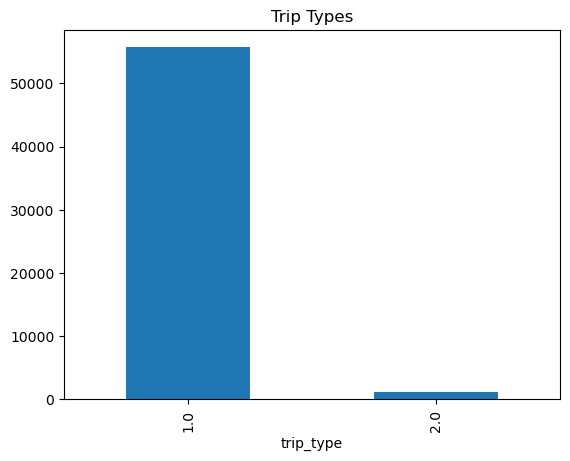

In [8]:
#Shows the different ways that New Yorkers hail a cab. 1=Street-hail, 2= Dispatch
tripdata_df['trip_type'].value_counts().plot(kind='bar', title='Trip Types')

# It appears that the vast majority of New Yorkers hail a cab via street-hail.

<Axes: title={'center': 'Top 5 Most Common Pick-Up Locations'}, xlabel='PULocationID'>

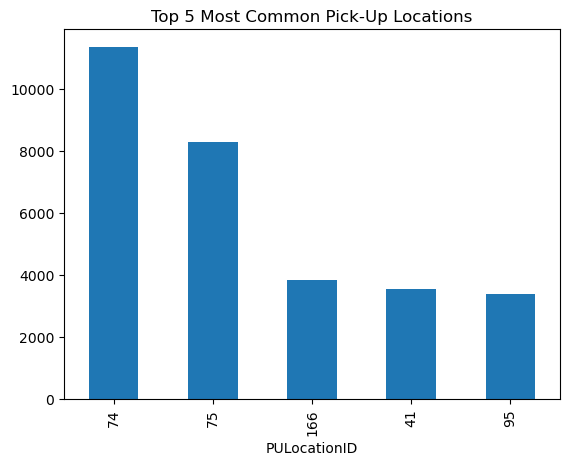

In [9]:
#Shows the top 5 most common pick-up locations
tripdata_df['PULocationID'].value_counts().head(5).plot(kind='bar', title='Top 5 Most Common Pick-Up Locations')

#It appears that the most common pick-up locations are location IDs 74, 75, 166, 41, and 95.

<Axes: title={'center': 'Top 5 Most Common Drop-off Locations'}, xlabel='DOLocationID'>

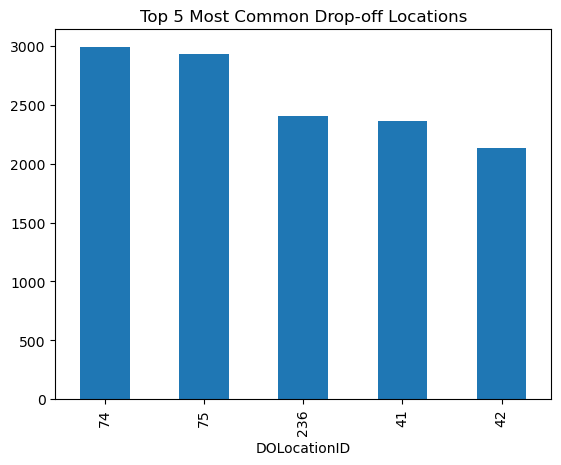

In [10]:
#Shows the top 5 most common drop-off locations
tripdata_df['DOLocationID'].value_counts().head(5).plot(kind='bar', title='Top 5 Most Common Drop-off Locations')

#It appears that the most common drop-off locations are location IDs 74, 75, 236, 41, and 42.

## 7. Data Analysis (10 pts)
Write suitable code to answer the following:
1. On average, how far do New Yorkers usually travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

In [11]:
print("Mean trip distance (in miles):")
print(tripdata_df['trip_distance'].mean())

print("Most expensive trip (in dollars):")
print(tripdata_df['total_amount'].max())

print("Least expensive trip (in dollars):")
print(tripdata_df['total_amount'].min())

under_2_miles = tripdata_df[tripdata_df['trip_distance'] < 2]
print("Lowest tip for trips that are under 2 miles(in dollars):")
print(under_2_miles['tip_amount'].min())
print("Average tip for trips that are under 2 miles(in dollars):")
print(under_2_miles['tip_amount'].mean())
print("Highest tip for trips that are under 2 miles(in dollars):")
print(under_2_miles['tip_amount'].max())

over_2_miles = tripdata_df[tripdata_df['trip_distance'] >= 2]
print("Lowest tip for trips that are 2 miles or over(in dollars):")
print(over_2_miles['tip_amount'].min())
print("Average tip for trips that are 2 miles or over(in dollars):")
print(over_2_miles['tip_amount'].mean())
print("Highest tip for trips that are 2 miles or over(in dollars):")
print(over_2_miles['tip_amount'].max())

#Data Analysis:
#On average, New Yorkers take relatively short taxi rides at about 2.8 miles per ride. Some trips are very cheap,
#at just one dollar, while others can be expensive, with one New Yorker paying fir a 322.35 dollar ride.
#Regardless of trip distance, some New Yorkers don't tip. Similarly, trip distance doesn't appear to influence the 
#maximum tip a New Yorker will give. However, trips longer than 2 miles tend to have higher average tips than trips
#shorter than 2 miles (About 3 dollars for trips >= 2 miles, but only about 1.37 dollars for trips < 2 miles).

Mean trip distance (in miles):
2.8334884294318625
Most expensive trip (in dollars):
322.35
Least expensive trip (in dollars):
1.01
Lowest tip for trips that are under 2 miles(in dollars):
0.0
Average tip for trips that are under 2 miles(in dollars):
1.3677164437346112
Highest tip for trips that are under 2 miles(in dollars):
80.0
Lowest tip for trips that are 2 miles or over(in dollars):
0.0
Average tip for trips that are 2 miles or over(in dollars):
2.9982239598922478
Highest tip for trips that are 2 miles or over(in dollars):
75.82


## 8. Findings (3 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

In [12]:
#It is true that the original dataset contained some missing and invalid data. However, after cleaning, 
#this data should be a viable source to better understand how New Yorkers use these taxis. So long as this data set does
#not contain any (very) unreasonable outliers or missing values, there is no good reason that this dataset should be avoided.
#That being said, it is important to recognize that the data could still be flawed/biased even after an preliminary cleaning. 